## Rescaling your data

In this notebook, we'll look at:
1. Standardisation
2. Normalisation
3. PowerTransforms

## load data from previous notebook
Note: this is the same data created in a previous notebook

In [9]:
import pandas as pd
X_train = pd.read_csv("cleaned.csv", index_col="index")

In [10]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
index,,,,,,,
29.0,4.0,121.0,113.0,2234.0,12.5,70.0,2.0
30.0,6.0,199.0,90.0,2648.0,15.0,70.0,1.0
354.0,4.0,85.0,65.0,1975.0,19.4,81.0,3.0
388.0,4.0,120.0,88.0,2160.0,14.5,82.0,3.0
76.0,8.0,350.0,160.0,4456.0,13.5,72.0,1.0


## Standardscaler

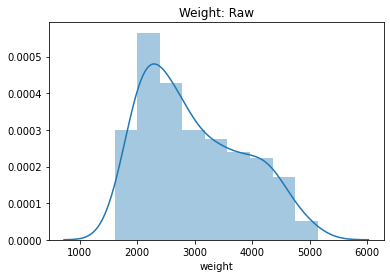

In [27]:
import seaborn as sns
_ = sns.distplot(X_train['weight']).set_title("Weight: Raw")

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scaled = scaler.fit_transform(X_train)

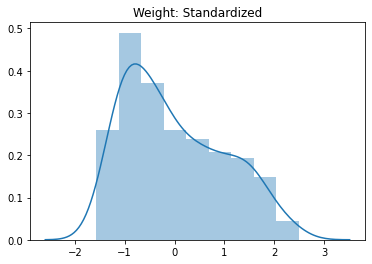

In [30]:
_ = sns.distplot(std_scaled[:, 3]).set_title("Weight: Standardized")

## normalisation

In [52]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
norm_scaled = normalizer.fit_transform(X_train)

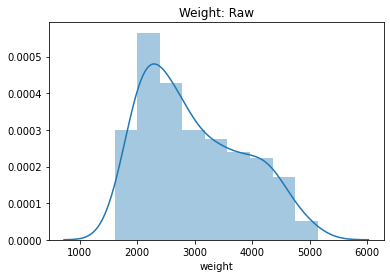

In [54]:
_ = sns.distplot(X_train['weight']).set_title("Weight: Raw")

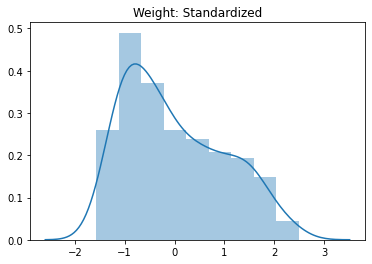

In [55]:
_ = sns.distplot(std_scaled[:, 3]).set_title("Weight: Standardized")

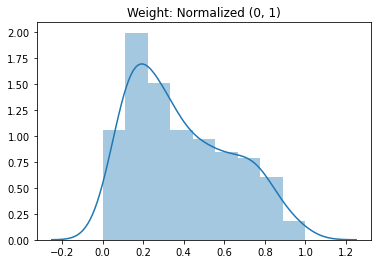

In [53]:
_ = sns.distplot(norm_scaled[:, 3]).set_title("Weight: Normalized (0, 1)")

## Other Scalers:
* RobustScaler (where you have many outliers)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler
* MaxAbsScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler
* Row Normalizer (normalizes across a row, instead of across a feature)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

## Power Transformer

In [62]:
import numpy as np
np.seterr(divide='ignore')
from sklearn.preprocessing import PowerTransformer

box_cox = PowerTransformer(method='box-cox')
bx_transformed = box_cox.fit_transform(X_train)


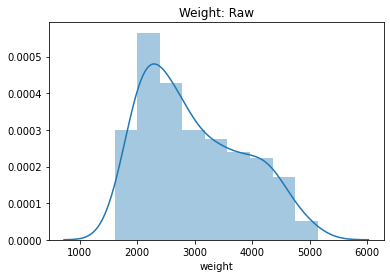

In [63]:
_ = sns.distplot(X_train['weight']).set_title("Weight: Raw")

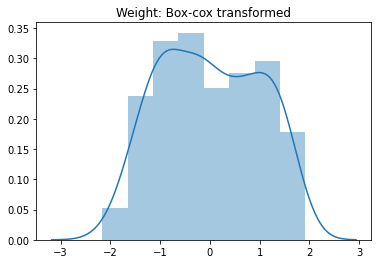

In [49]:
_ = sns.distplot(bx_transformed[:,3]).set_title("Weight: Box-cox transformed")

### Other Transformers
* PowerTransformer(method='yeo-johnson')
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer
* QuantileTransformer (non-linear transform to force to normal distribution)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer